Aim: In this project, I analyzed a Kaggle dataset containing patient diagnoses, treatment plans, heart rate data, age, and gender to uncover trends in disease diagnosis and treatment effectiveness

Step 1: Importing all the necessary libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/users/Faizan/downloads/disease_diagnosis.csv')
df.head()


Step 2: Data Overview and Initial Observations

In [6]:
df.info()
df.describe()
# Check for missing values
print(df.isnull().sum())
# Check for unique values in categorical columns
print(df[['Gender', 'Diagnosis', 'Severity', 'Treatment_Plan']].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           2000 non-null   int64  
 1   Age                  2000 non-null   int64  
 2   Gender               2000 non-null   object 
 3   Symptom_1            2000 non-null   object 
 4   Symptom_2            2000 non-null   object 
 5   Symptom_3            2000 non-null   object 
 6   Heart_Rate_bpm       2000 non-null   int64  
 7   Body_Temperature_C   2000 non-null   float64
 8   Blood_Pressure_mmHg  2000 non-null   object 
 9   Oxygen_Saturation_%  2000 non-null   int64  
 10  Diagnosis            2000 non-null   object 
 11  Severity             2000 non-null   object 
 12  Treatment_Plan       2000 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 203.3+ KB
Patient_ID             0
Age                    0
Gender                 0
Symp

Step 3: Data Cleaning and Preprocessing

In [8]:

# Standardize text data 
df['Gender'] = df['Gender'].str.lower()

# Ensuring all blood pressure values are formatted as strings
df['Blood_Pressure_mmHg'] = df['Blood_Pressure_mmHg'].astype(str)

# Checking for duplicates and remove them if needed
df.drop_duplicates(inplace=True)


Step 4: Exploratory Data Analysis (EDA)

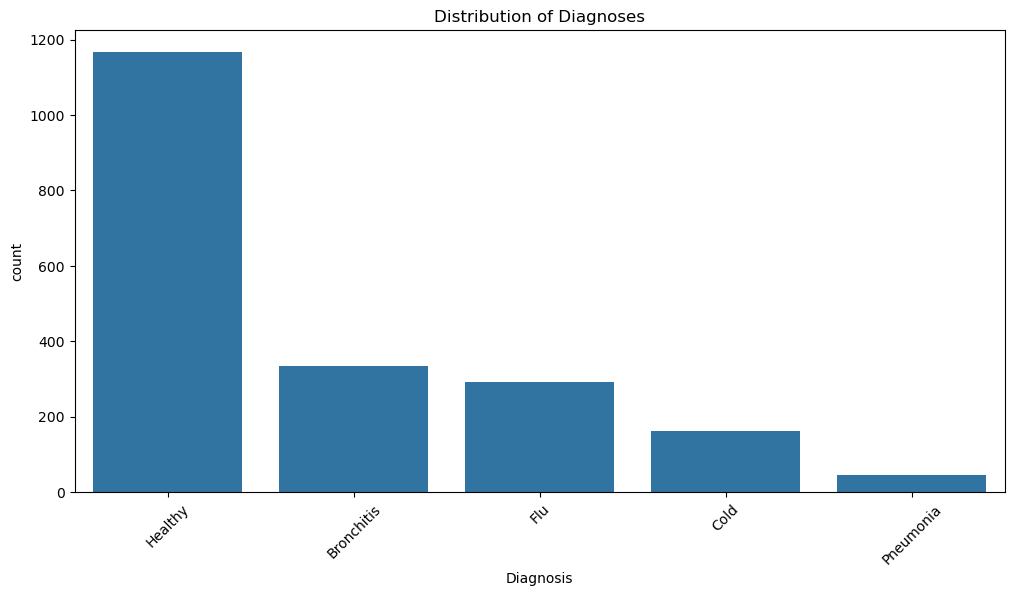

In [11]:
# Countplot of the 'Diagnosis' column
# 4.1 Distribution of Diagnoses
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Diagnosis', order=df['Diagnosis'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Diagnoses')
plt.show()


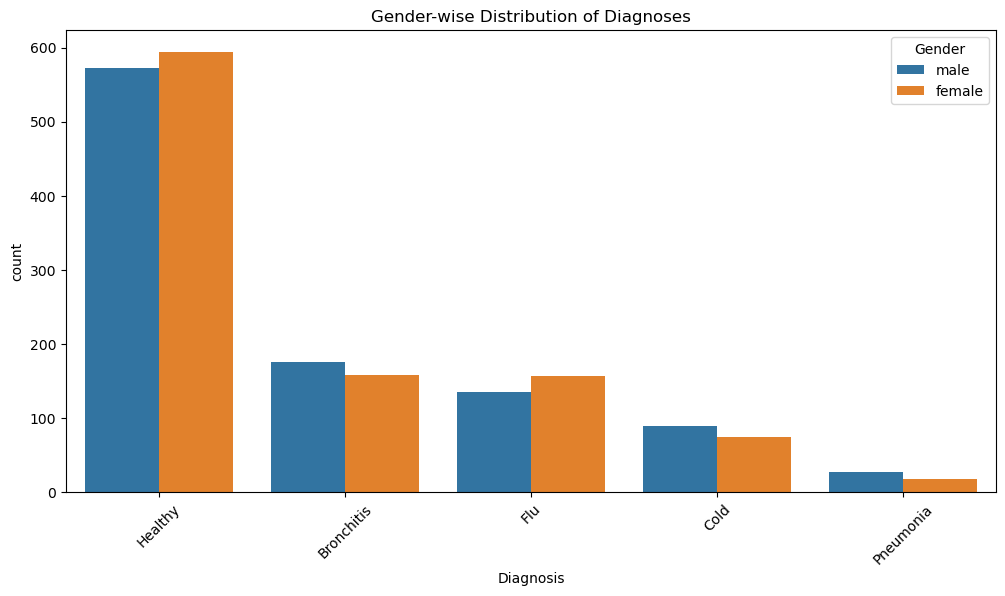

In [13]:
# 4.2 Gender vs Diagnosis Trends
# Create a countplot to compare diagnosis frequency by gender
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Diagnosis', hue='Gender', order=df['Diagnosis'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Gender-wise Distribution of Diagnoses')
plt.show()


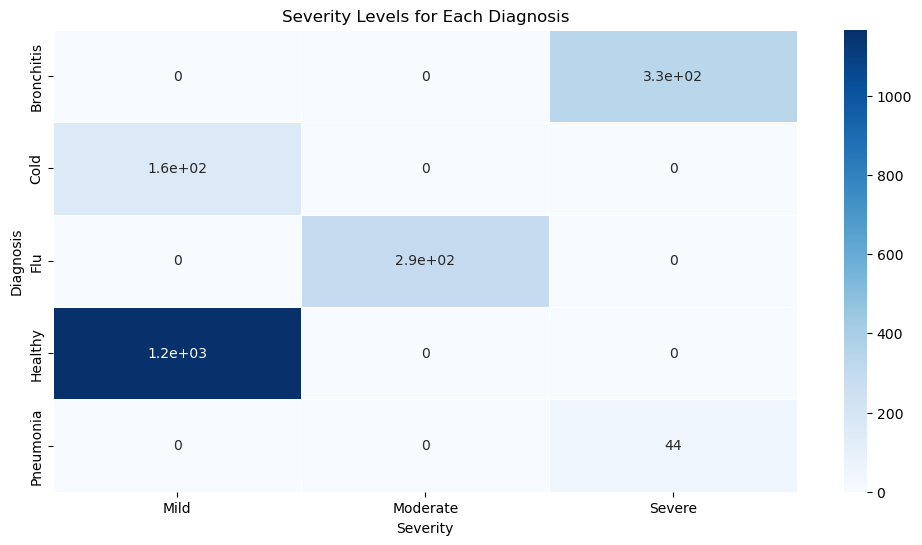

In [15]:
# 4.3 Severity Distribution for Diagnoses
# Heatmap to show severity counts for each diagnosis
severity_counts = pd.crosstab(df['Diagnosis'], df['Severity'])

plt.figure(figsize=(12, 6))
sns.heatmap(severity_counts, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Severity Levels for Each Diagnosis')
plt.show()


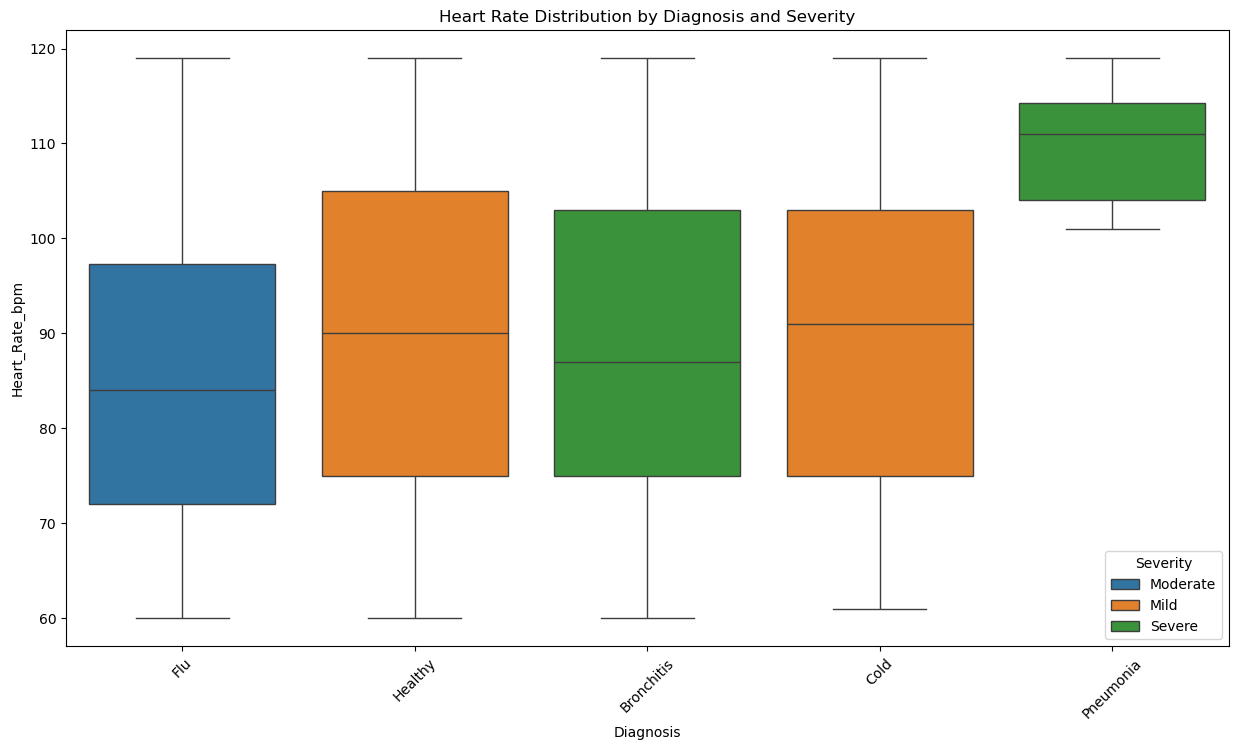

In [17]:
# 4.4 Heart Rate Distribution by Diagnosis and Severity
# Boxplot to show heart rate distribution for each diagnosis and severity level
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Diagnosis', y='Heart_Rate_bpm', hue='Severity')
plt.xticks(rotation=45)
plt.title('Heart Rate Distribution by Diagnosis and Severity')
plt.show()


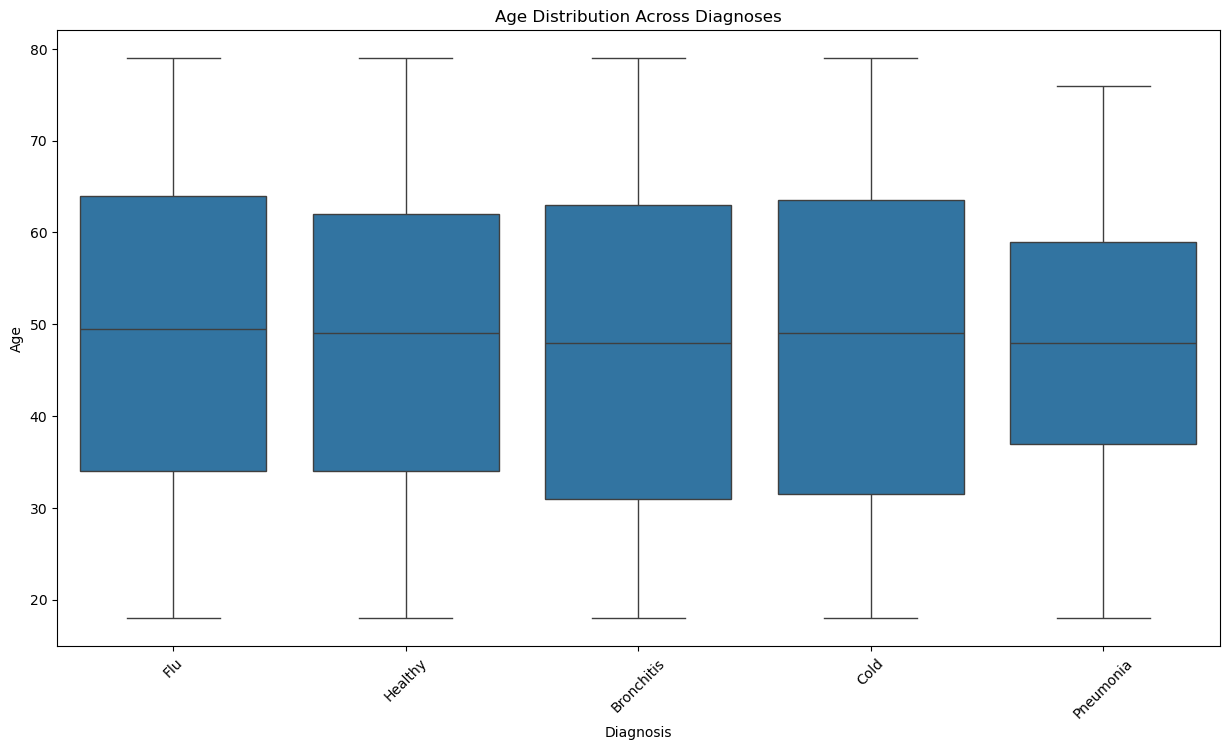

In [19]:
# 4.5 Age Trends Across Diagnoses
# Boxplot for age distribution across diagnoses
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Diagnosis', y='Age')
plt.xticks(rotation=45)
plt.title('Age Distribution Across Diagnoses')
plt.show()


Step 5: Statistical Analysis

In [22]:
# 5.1 Group Statistics for Severity Levels
# Calculate mean values of key medical metrics grouped by severity
severity_stats = df.groupby('Severity')[['Heart_Rate_bpm', 'Body_Temperature_C', 'Oxygen_Saturation_%']].mean()
print(severity_stats)


          Heart_Rate_bpm  Body_Temperature_C  Oxygen_Saturation_%
Severity                                                         
Mild           89.781955           37.464060            95.121053
Moderate       85.667808           38.999658            94.941781
Severe         91.145503           37.743122            91.939153


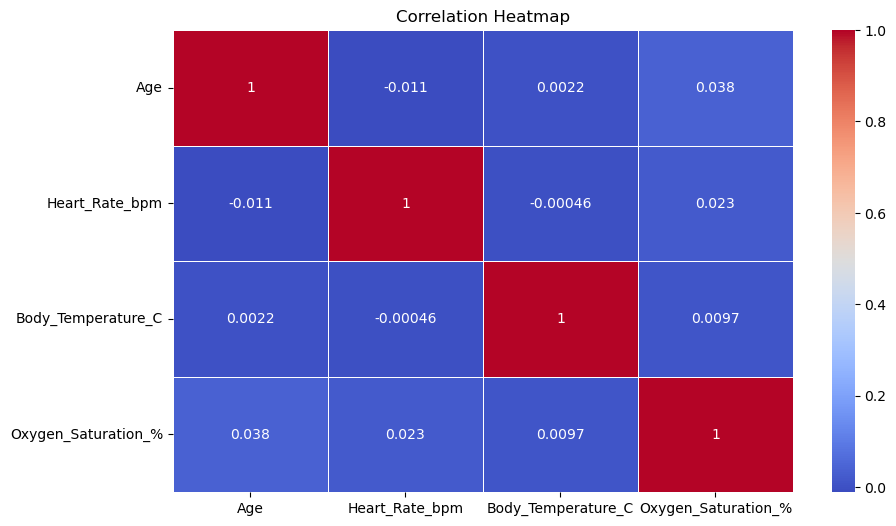

In [24]:
# 5.2 Correlation Analysis
# Calculate the correlation matrix
corr_matrix = df[['Age', 'Heart_Rate_bpm', 'Body_Temperature_C', 'Oxygen_Saturation_%']].corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


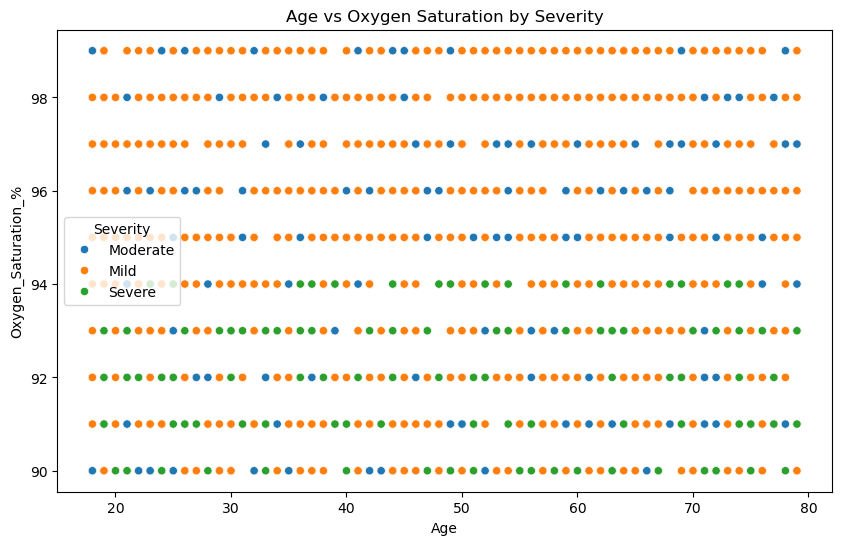

In [26]:
# 5.3 Relationship Between Age and Oxygen Saturation
# Scatter plot to explore relationship between age and oxygen saturation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Oxygen_Saturation_%', hue='Severity')
plt.title('Age vs Oxygen Saturation by Severity')
plt.show()


Step 6: Insights from Treatment Plans

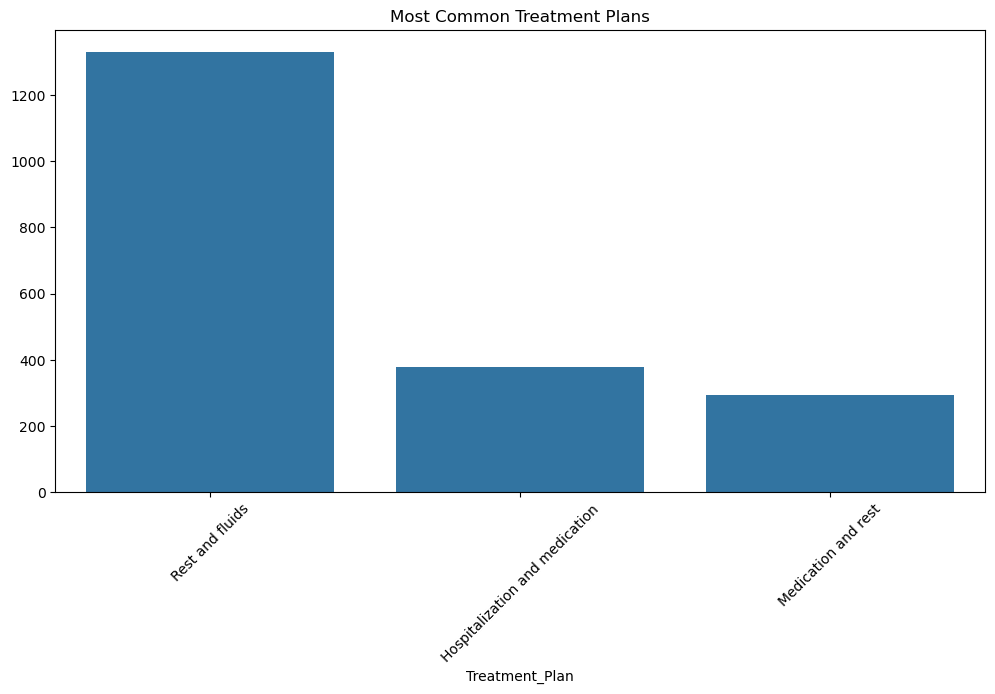

In [29]:
# 6.1 Most Common Treatment Plans
# Find the most common treatment plans
treatment_counts = df['Treatment_Plan'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=treatment_counts.index, y=treatment_counts.values)
plt.xticks(rotation=45)
plt.title('Most Common Treatment Plans')
plt.show()


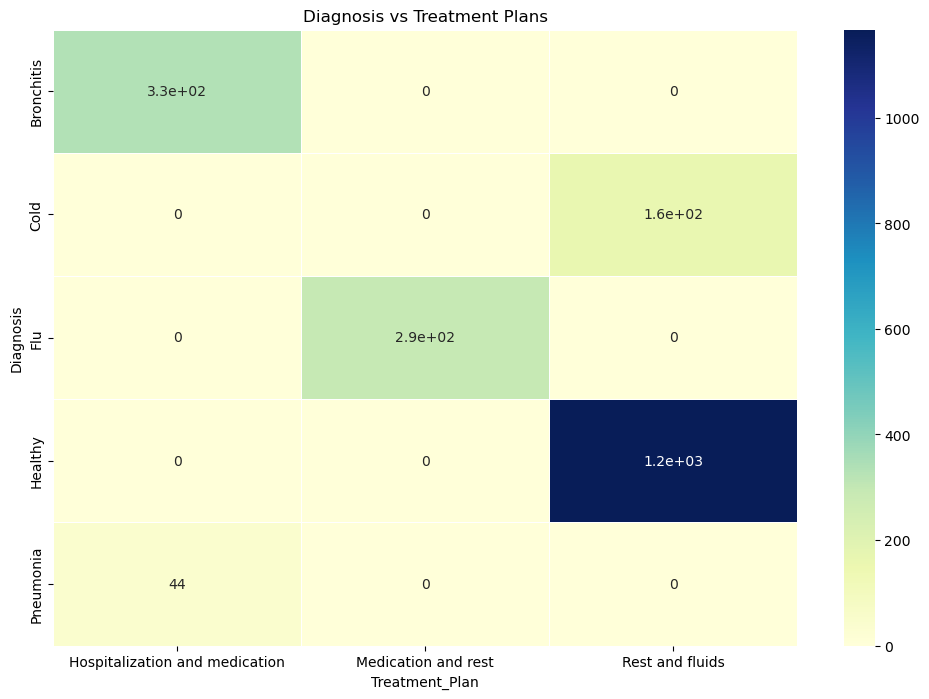

In [31]:
# 6.2 Diagnosis vs Treatment Plan Trends
# Crosstab to compare diagnoses and treatment plans
treatment_vs_diagnosis = pd.crosstab(df['Diagnosis'], df['Treatment_Plan'])

plt.figure(figsize=(12, 8))
sns.heatmap(treatment_vs_diagnosis, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Diagnosis vs Treatment Plans')
plt.show()


Step 7: Summary of Key Insights

Summarizing the main insights gathered from the analysis.

1: Treatment Plans: "Rest and fluids" is the most commonly prescribed treatment plan, suggesting that many conditions were mild and did not require intensive medical intervention.

2: Oxygen Saturation vs Age: Oxygen saturation levels tend to remain stable across age groups but may show more variability with increasing severity of illness.

3: Weak Correlations: There is no strong correlation between age, heart rate, body temperature, and oxygen saturation, indicating that these metrics operate independently in this dataset.

4: Age Distribution: Most diagnoses, with slight variations, affect middle-aged and older patients. Pneumonia and bronchitis cases are more common in older individuals.

5: Heart Rate and Severity: Higher heart rates are associated with severe cases, particularly in patients with pneumonia and bronchitis.

6: Severity by Diagnosis: Most cases fall under the "Mild" category, particularly for healthy and cold patients. Severe cases are more frequent in patients with bronchitis and pneumonia.

7: Gender Distribution: The distribution of diagnoses between genders is fairly balanced, with a slightly higher number of healthy female patients.

8: Diagnosis Distribution: Most patients are healthy, followed by those diagnosed with bronchitis, flu, and colds. Pneumonia cases are rare, indicating that most conditions are less severe.